In [2]:
import pandas as pd
from nilm_pre_processing import NilmPreProcessing
import numpy as np
import os

In [3]:
nilm_pp = NilmPreProcessing()

In [4]:
def cal_rms(inputs):
    return np.sqrt(np.mean(np.power(inputs, 2)))

def cal_all_rms(instant_current, instant_voltage, pfs):
    Irms = cal_rms(instant_current)
    Urms = cal_rms(instant_voltage)
    avg_pf = np.mean(pfs) / 100
    P = Urms * Irms * avg_pf
    S = Urms * Irms
    Q = Urms * Irms * (1 - avg_pf ** 2)
    return Irms, Urms, avg_pf, P, Q, S

def get_features(df):
    instant_current = df["currentWaveform"].values
    instant_voltage = df["voltageWaveform"].values
    pfs = df["powerFactor"].values
    return cal_all_rms(instant_current, instant_voltage, pfs)

def cal_RMS_features(window_df, window_size, label):
    process_datas = []
    for i in range(window_size, len(window_df)):
        window = window_df.iloc[i - window_size:i]
        time = window["Time"].values[0]
        In = window["currentWaveform"].values[0]
        Un = window["voltageWaveform"].values[0]
        pfN = window["powerFactor"].values[0]/100
        Irms, Urms, avg_pf, P, Q, S = get_features(window)
        process_datas.append([time, In, Un, pfN, Irms, Urms, avg_pf, P, Q, S, label])
    return pd.DataFrame(process_datas, columns=["Time", "In", "Un", "PF_n", "Irms", "Urms", "MeanPF", "P", "Q", "S", "Label"])

In [5]:
den_df = pd.read_excel("/opt/nilm-shared-data/nilm_device_detection/VNDALE_v1/raw_data/20240113_data_den_1.xlsx")
den_maysay = pd.read_excel("/opt/nilm-shared-data/nilm_device_detection/VNDALE_v1/raw_data/20240115_data_den_maysay_3.xlsx")
den_maysay_maylockk = pd.read_excel("/opt/nilm-shared-data/nilm_device_detection/VNDALE_v1/raw_data/20240114_data_den_maysay_maylockk_1.xlsx")

In [6]:
den_rms_df = cal_RMS_features(den_df[10000:13600], 1800, "LED")
den_maysay_rms_df = cal_RMS_features(den_maysay[10000:13600], 1800, "LED")
den_maysay_maylockk_rms_df = cal_RMS_features(den_maysay_maylockk[10000:13600], 1800, "LED")

In [7]:
# Concatenate all RMS dataframes into a single dataframe
all_rms_data = pd.concat([den_rms_df, den_maysay_rms_df, den_maysay_maylockk_rms_df], axis=0, ignore_index=True)

# Display the first few rows of the combined dataset
print(f"Combined dataset shape: {all_rms_data.shape}")
all_rms_data.head()

Combined dataset shape: (5400, 11)


,Time,In,Un,PF_n,Irms,Urms,MeanPF,P,Q,S,Label
0,2024-01-13_17-18-07,0.001575,-118.471970,0.975711,0.017735,168.181082,0.885954,2.642588,0.641547,2.982759,LED
1,2024-01-13_17-18-07,-0.000817,-11.838306,0.999555,0.017735,168.205677,0.885963,2.642998,0.641592,2.983191,LED
2,2024-01-13_17-18-07,-0.000525,76.377937,0.979918,0.017786,168.290431,0.885959,2.651903,0.643778,2.993257,LED
3,2024-01-13_17-18-07,-0.004199,176.195419,0.979918,0.017789,168.365458,0.885966,2.653573,0.644143,2.995119,LED
4,2024-01-13_17-18-07,0.045085,227.950653,0.979918,0.017789,168.391797,0.885553,2.652713,0.646425,2.995544,LED


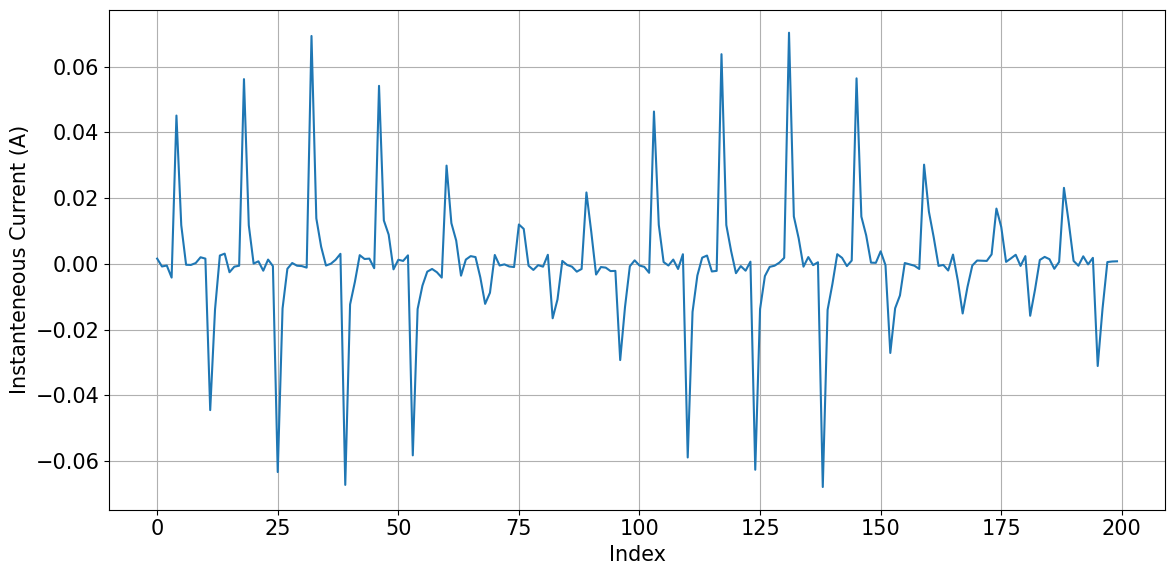

In [18]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(12, 6))
plt.plot(all_rms_data['In'][0:200])
# plt.plot(all_rms_data['Un'][0:200])

# plt.title('')
plt.xlabel('Index')
plt.ylabel('Instanteneous Current (A)')
# plt.ylabel('Instanteneous Voltage (V)')
plt.grid(True)
plt.tight_layout()
plt.show()

# If you want to examine the statistical properties of Irms
# print(f"statistics:\n{all_rms_data['In'].describe()}")

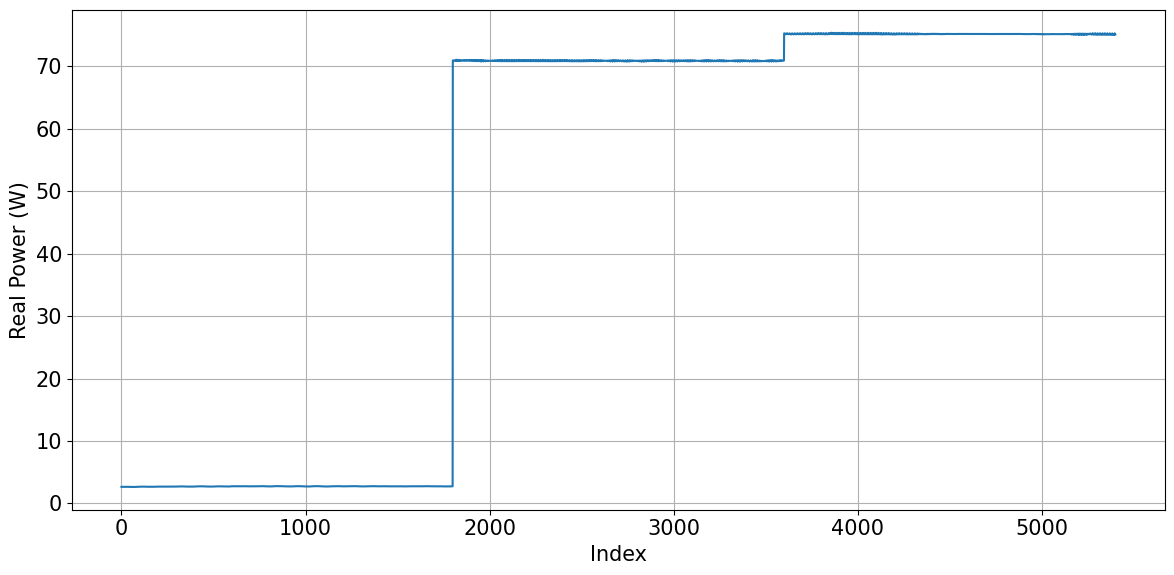

Real Power (P) statistics:
count    5400.000000
mean       49.604735
std        33.203040
min         2.620270
25%         2.738611
50%        70.896181
75%        75.170871
max        75.395618
Name: P, dtype: float64


In [20]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(12, 6))
plt.plot(all_rms_data['P'])
# plt.title('')
plt.xlabel('Index')
plt.ylabel('Real Power (W)')
plt.grid(True)
plt.tight_layout()
plt.show()

# If you want to examine the statistical properties of Irms
print(f"Real Power (P) statistics:\n{all_rms_data['P'].describe()}")

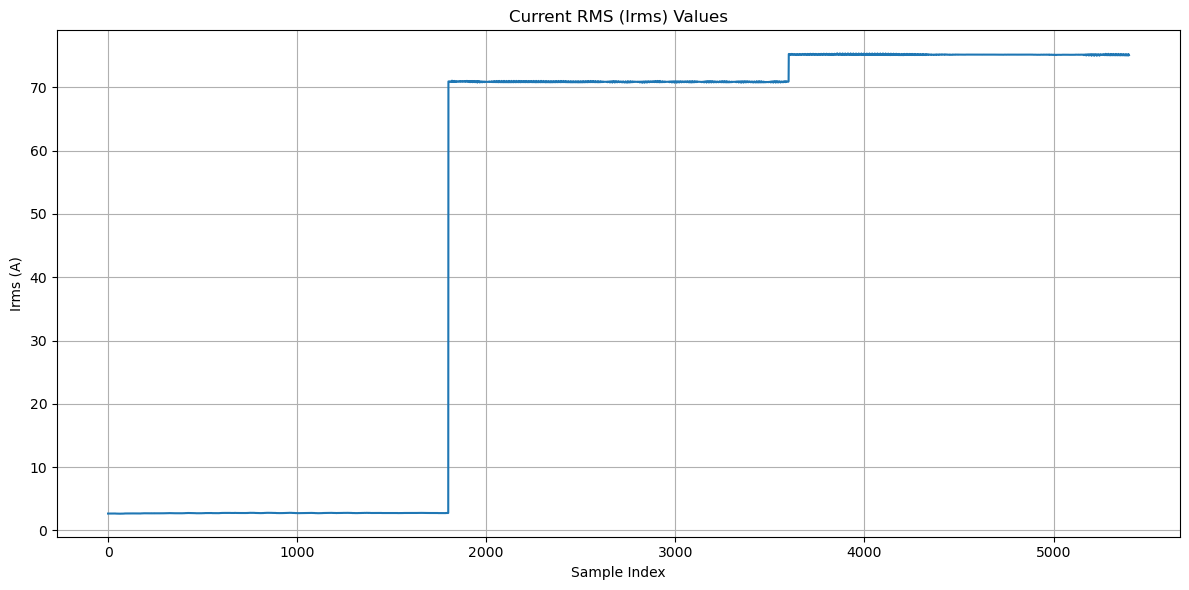

Irms statistics:
count    5400.000000
mean        0.324276
std         0.216835
min         0.017595
25%         0.018241
50%         0.462284
75%         0.492248
max         0.493186
Name: Irms, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(all_rms_data['P'])
plt.title('Power Values')
plt.xlabel('Sample Index')
plt.ylabel('Irms (A)')
plt.grid(True)
plt.tight_layout()
plt.show()

# If you want to examine the statistical properties of Irms
print(f"Irms statistics:\n{all_rms_data['Irms'].describe()}")